In [81]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import math

In [82]:
SmartMeter = pd.read_csv('/Users/yukai/Desktop/沙鹿CO.csv')
SmartMeter.head(10)

,tstp,CO
0,2018/1/1,0.28
1,2018/1/1,0.27
2,2018/1/1,0.26
3,2018/1/1,0.26
4,2018/1/1,0.25
5,2018/1/1,0.26
6,2018/1/1,0.27
7,2018/1/1,0.32
8,2018/1/1,0.32
9,2018/1/1,0.30


In [83]:
SmartMeter_original = SmartMeter['CO'][0:24].to_numpy()
print(SmartMeter_original)

[0.28 0.27 0.26 0.26 0.25 0.26 0.27 0.32 0.32 0.3  0.33 0.35 0.35 0.35
 0.36 0.37 0.4  0.42 0.45 0.46 0.53 0.61 0.59 0.59]


In [84]:
# Bounded-Error Run Length Encoding(BERLE)
# Define High Precision Bounded-Error
bounded_error_high_precision = 0.004
temp1 = SmartMeter_original
upperBounded = temp1 + bounded_error_high_precision
lowerBounded = temp1 - bounded_error_high_precision
print(upperBounded)
print(temp1)
print(lowerBounded)

[0.284 0.274 0.264 0.264 0.254 0.264 0.274 0.324 0.324 0.304 0.334 0.354
 0.354 0.354 0.364 0.374 0.404 0.424 0.454 0.464 0.534 0.614 0.594 0.594]
[0.28 0.27 0.26 0.26 0.25 0.26 0.27 0.32 0.32 0.3  0.33 0.35 0.35 0.35
 0.36 0.37 0.4  0.42 0.45 0.46 0.53 0.61 0.59 0.59]
[0.276 0.266 0.256 0.256 0.246 0.256 0.266 0.316 0.316 0.296 0.326 0.346
 0.346 0.346 0.356 0.366 0.396 0.416 0.446 0.456 0.526 0.606 0.586 0.586]


In [85]:
# BERLE Algorithm
upperBound = upperBounded[0]
lowerBound = lowerBounded[0]

counter = 0
index = 0
bOverlap = False
dataSize = np.size(temp1)
print(dataSize)

high_precision_RLE = []
high_precision_result = []

while True :
    if (index == dataSize):
        high_precision_RLE.append(round(lowerBound,3))
        high_precision_RLE.append(counter)
        for i in range(counter):
            high_precision_result.append(round(lowerBound,3))
        break
    # 上下界都在範圍內
    if (upperBounded[index] <= upperBound and lowerBounded[index] >= lowerBound):
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
        counter = counter + 1
    # 只有上界在範圍內
    elif (upperBounded[index] > lowerBound and upperBounded[index] <= upperBound):
        upperBound = upperBounded[index]
        counter = counter + 1
    # 只有下界在範圍內    
    elif (lowerBounded[index] >= lowerBound and lowerBounded[index] < upperBound):
        lowerBound = lowerBounded[index]
        counter = counter + 1
    #     
    elif (upperBounded[index] > upperBound and lowerBounded[index] < lowerBound):
        counter = counter + 1
    #    
    else:
        high_precision_RLE.append(round(lowerBound,3))
        high_precision_RLE.append(counter)

        for i in range(counter):
            high_precision_result.append(round(lowerBound,3))
        counter = 1
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
    index = index + 1
# print(len(high_precision_RLE))
# print(high_precision_RLE)
for i in high_precision_result:
    print(i)

24
0.276
0.266
0.256
0.256
0.246
0.256
0.266
0.316
0.316
0.296
0.326
0.346
0.346
0.346
0.356
0.366
0.396
0.416
0.446
0.456
0.526
0.606
0.586
0.586


In [86]:
# Layered BERLE(LBE-RLE)
# Define Medium Precision Bounded-Error
bounded_error_medium_precision = 0.008
difference_bounded_error = bounded_error_medium_precision - bounded_error_high_precision

temp2 = np.array(high_precision_result)

upperBounded = temp2 + difference_bounded_error
lowerBounded = temp2 - difference_bounded_error
print(upperBounded)
print(temp2)
print(lowerBounded)

[0.28 0.27 0.26 0.26 0.25 0.26 0.27 0.32 0.32 0.3  0.33 0.35 0.35 0.35
 0.36 0.37 0.4  0.42 0.45 0.46 0.53 0.61 0.59 0.59]
[0.276 0.266 0.256 0.256 0.246 0.256 0.266 0.316 0.316 0.296 0.326 0.346
 0.346 0.346 0.356 0.366 0.396 0.416 0.446 0.456 0.526 0.606 0.586 0.586]
[0.272 0.262 0.252 0.252 0.242 0.252 0.262 0.312 0.312 0.292 0.322 0.342
 0.342 0.342 0.352 0.362 0.392 0.412 0.442 0.452 0.522 0.602 0.582 0.582]


In [87]:
# LBE-RLE Algorithm
upperBound = upperBounded[0]
lowerBound = lowerBounded[0]

counter = 0
index = 0
bOverlap = False
# dataSize = np.size(temp1)
# print(dataSize)

medium_precision_RLE = []
medium_precision_result = []

while True :
    if (index == dataSize):
        # Random Choose LBE-RLE Symbol from Region
        symbol = random.uniform(lowerBound, upperBound)
        
        medium_precision_RLE.append(round(symbol,3))
        medium_precision_RLE.append(counter)
        for i in range(counter):
            medium_precision_result.append(round(symbol,3))
        break
    # 上下界都在範圍內
    if (upperBounded[index] <= upperBound and lowerBounded[index] >= lowerBound):
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
        counter = counter + 1
    # 只有上界在範圍內
    elif (upperBounded[index] > lowerBound and upperBounded[index] <= upperBound):
        upperBound = upperBounded[index]
        counter = counter + 1
    # 只有下界在範圍內    
    elif (lowerBounded[index] >= lowerBound and lowerBounded[index] < upperBound):
        lowerBound = lowerBounded[index]
        counter = counter + 1
    #     
    elif (upperBounded[index] > upperBound and lowerBounded[index] < lowerBound):
        counter = counter + 1
    #    
    else:
        # Random Choose LBE-RLE Symbol from Region
        symbol = random.uniform(lowerBound, upperBound)
        
        medium_precision_RLE.append(round(symbol,3))
        medium_precision_RLE.append(counter)

        for i in range(counter):
            medium_precision_result.append(round(symbol,3))
        counter = 1
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
    index = index + 1
# print(len(medium_precision_RLE))
# print(medium_precision_RLE)
for i in medium_precision_result:
    print(i)

0.275
0.266
0.256
0.256
0.249
0.253
0.266
0.317
0.317
0.296
0.327
0.349
0.349
0.349
0.359
0.364
0.393
0.417
0.447
0.459
0.53
0.604
0.586
0.586


In [88]:
# Layered BERLE(LBE-RLE)
# Define Low Precision Bounded-Error
bounded_error_low_precision = 0.0012
difference_bounded_error = bounded_error_low_precision - bounded_error_high_precision

temp3 = np.array(high_precision_result)

upperBounded = temp3 + difference_bounded_error
lowerBounded = temp3 - difference_bounded_error
print(upperBounded)
print(temp3)
print(lowerBounded)

[0.2732 0.2632 0.2532 0.2532 0.2432 0.2532 0.2632 0.3132 0.3132 0.2932
 0.3232 0.3432 0.3432 0.3432 0.3532 0.3632 0.3932 0.4132 0.4432 0.4532
 0.5232 0.6032 0.5832 0.5832]
[0.276 0.266 0.256 0.256 0.246 0.256 0.266 0.316 0.316 0.296 0.326 0.346
 0.346 0.346 0.356 0.366 0.396 0.416 0.446 0.456 0.526 0.606 0.586 0.586]
[0.2788 0.2688 0.2588 0.2588 0.2488 0.2588 0.2688 0.3188 0.3188 0.2988
 0.3288 0.3488 0.3488 0.3488 0.3588 0.3688 0.3988 0.4188 0.4488 0.4588
 0.5288 0.6088 0.5888 0.5888]


In [89]:
# LBE-RLE Algorithm
upperBound = upperBounded[0]
lowerBound = lowerBounded[0]

counter = 0
index = 0
bOverlap = False
dataSize = np.size(temp1)
print(dataSize)

low_precision_RLE = []
low_precision_result = []

while True :
    if (index == dataSize):
        # Random Choose LBE-RLE Symbol from Region
        symbol = random.uniform(lowerBound, upperBound)
        
        low_precision_RLE.append(round(symbol,3))
        low_precision_RLE.append(counter)
        for i in range(counter):
            low_precision_result.append(round(symbol,3))
        break
    # 上下界都在範圍內
    if (upperBounded[index] <= upperBound and lowerBounded[index] >= lowerBound):
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
        counter = counter + 1
    # 只有上界在範圍內
    elif (upperBounded[index] > lowerBound and upperBounded[index] <= upperBound):
        upperBound = upperBounded[index]
        counter = counter + 1
    # 只有下界在範圍內    
    elif (lowerBounded[index] >= lowerBound and lowerBounded[index] < upperBound):
        lowerBound = lowerBounded[index]
        counter = counter + 1
    #     
    elif (upperBounded[index] > upperBound and lowerBounded[index] < lowerBound):
        counter = counter + 1
    #    
    else:
        # Random Choose LBE-RLE Symbol from Region
        symbol = random.uniform(lowerBound, upperBound)
        
        low_precision_RLE.append(round(symbol,3))
        low_precision_RLE.append(counter)

        for i in range(counter):
            low_precision_result.append(round(symbol,3))
        counter = 1
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
    index = index + 1
# print(len(low_precision_RLE))
# print(low_precision_RLE)
for i in low_precision_result:
    print(i)

24
0.276
0.266
0.254
0.254
0.247
0.256
0.264
0.315
0.315
0.298
0.324
0.349
0.349
0.349
0.355
0.368
0.396
0.418
0.444
0.458
0.527
0.608
0.585
0.585


In [90]:
# Layered BERLE(LBE-RLE)
# Define Low Precision Bounded-Error
bounded_error_low_low_precision = 0.016
difference_bounded_error = bounded_error_low_low_precision - bounded_error_high_precision

temp4 = np.array(high_precision_result)

upperBounded = temp4 + difference_bounded_error
lowerBounded = temp4 - difference_bounded_error
print(upperBounded)
print(temp4)
print(lowerBounded)

[0.288 0.278 0.268 0.268 0.258 0.268 0.278 0.328 0.328 0.308 0.338 0.358
 0.358 0.358 0.368 0.378 0.408 0.428 0.458 0.468 0.538 0.618 0.598 0.598]
[0.276 0.266 0.256 0.256 0.246 0.256 0.266 0.316 0.316 0.296 0.326 0.346
 0.346 0.346 0.356 0.366 0.396 0.416 0.446 0.456 0.526 0.606 0.586 0.586]
[0.264 0.254 0.244 0.244 0.234 0.244 0.254 0.304 0.304 0.284 0.314 0.334
 0.334 0.334 0.344 0.354 0.384 0.404 0.434 0.444 0.514 0.594 0.574 0.574]


In [91]:
# LBE-RLE Algorithm
upperBound = upperBounded[0]
lowerBound = lowerBounded[0]

counter = 0
index = 0
bOverlap = False
dataSize = np.size(temp1)
print(dataSize)

low_low_precision_RLE = []
low_low_precision_result = []

while True :
    if (index == dataSize):
        # Random Choose LBE-RLE Symbol from Region
        symbol = random.uniform(lowerBound, upperBound)
        
        low_low_precision_RLE.append(round(symbol,3))
        low_low_precision_RLE.append(counter)
        for i in range(counter):
            low_low_precision_result.append(round(symbol,3))
        break
    # 上下界都在範圍內
    if (upperBounded[index] <= upperBound and lowerBounded[index] >= lowerBound):
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
        counter = counter + 1
    # 只有上界在範圍內
    elif (upperBounded[index] > lowerBound and upperBounded[index] <= upperBound):
        upperBound = upperBounded[index]
        counter = counter + 1
    # 只有下界在範圍內    
    elif (lowerBounded[index] >= lowerBound and lowerBounded[index] < upperBound):
        lowerBound = lowerBounded[index]
        counter = counter + 1
    #     
    elif (upperBounded[index] > upperBound and lowerBounded[index] < lowerBound):
        counter = counter + 1
    #    
    else:
        # Random Choose LBE-RLE Symbol from Region
        symbol = random.uniform(lowerBound, upperBound)
        
        low_low_precision_RLE.append(round(symbol,3))
        low_low_precision_RLE.append(counter)

        for i in range(counter):
            low_low_precision_result.append(round(symbol,3))
        counter = 1
        upperBound = upperBounded[index]
        lowerBound = lowerBounded[index]
    index = index + 1
# print(len(low_low_precision_RLE))
# print(low_low_precision_RLE)
for i in low_low_precision_result:
    print(i)

24
0.267
0.267
0.267
0.267
0.254
0.254
0.254
0.304
0.304
0.304
0.337
0.337
0.337
0.337
0.363
0.363
0.407
0.407
0.453
0.453
0.526
0.596
0.596
0.596


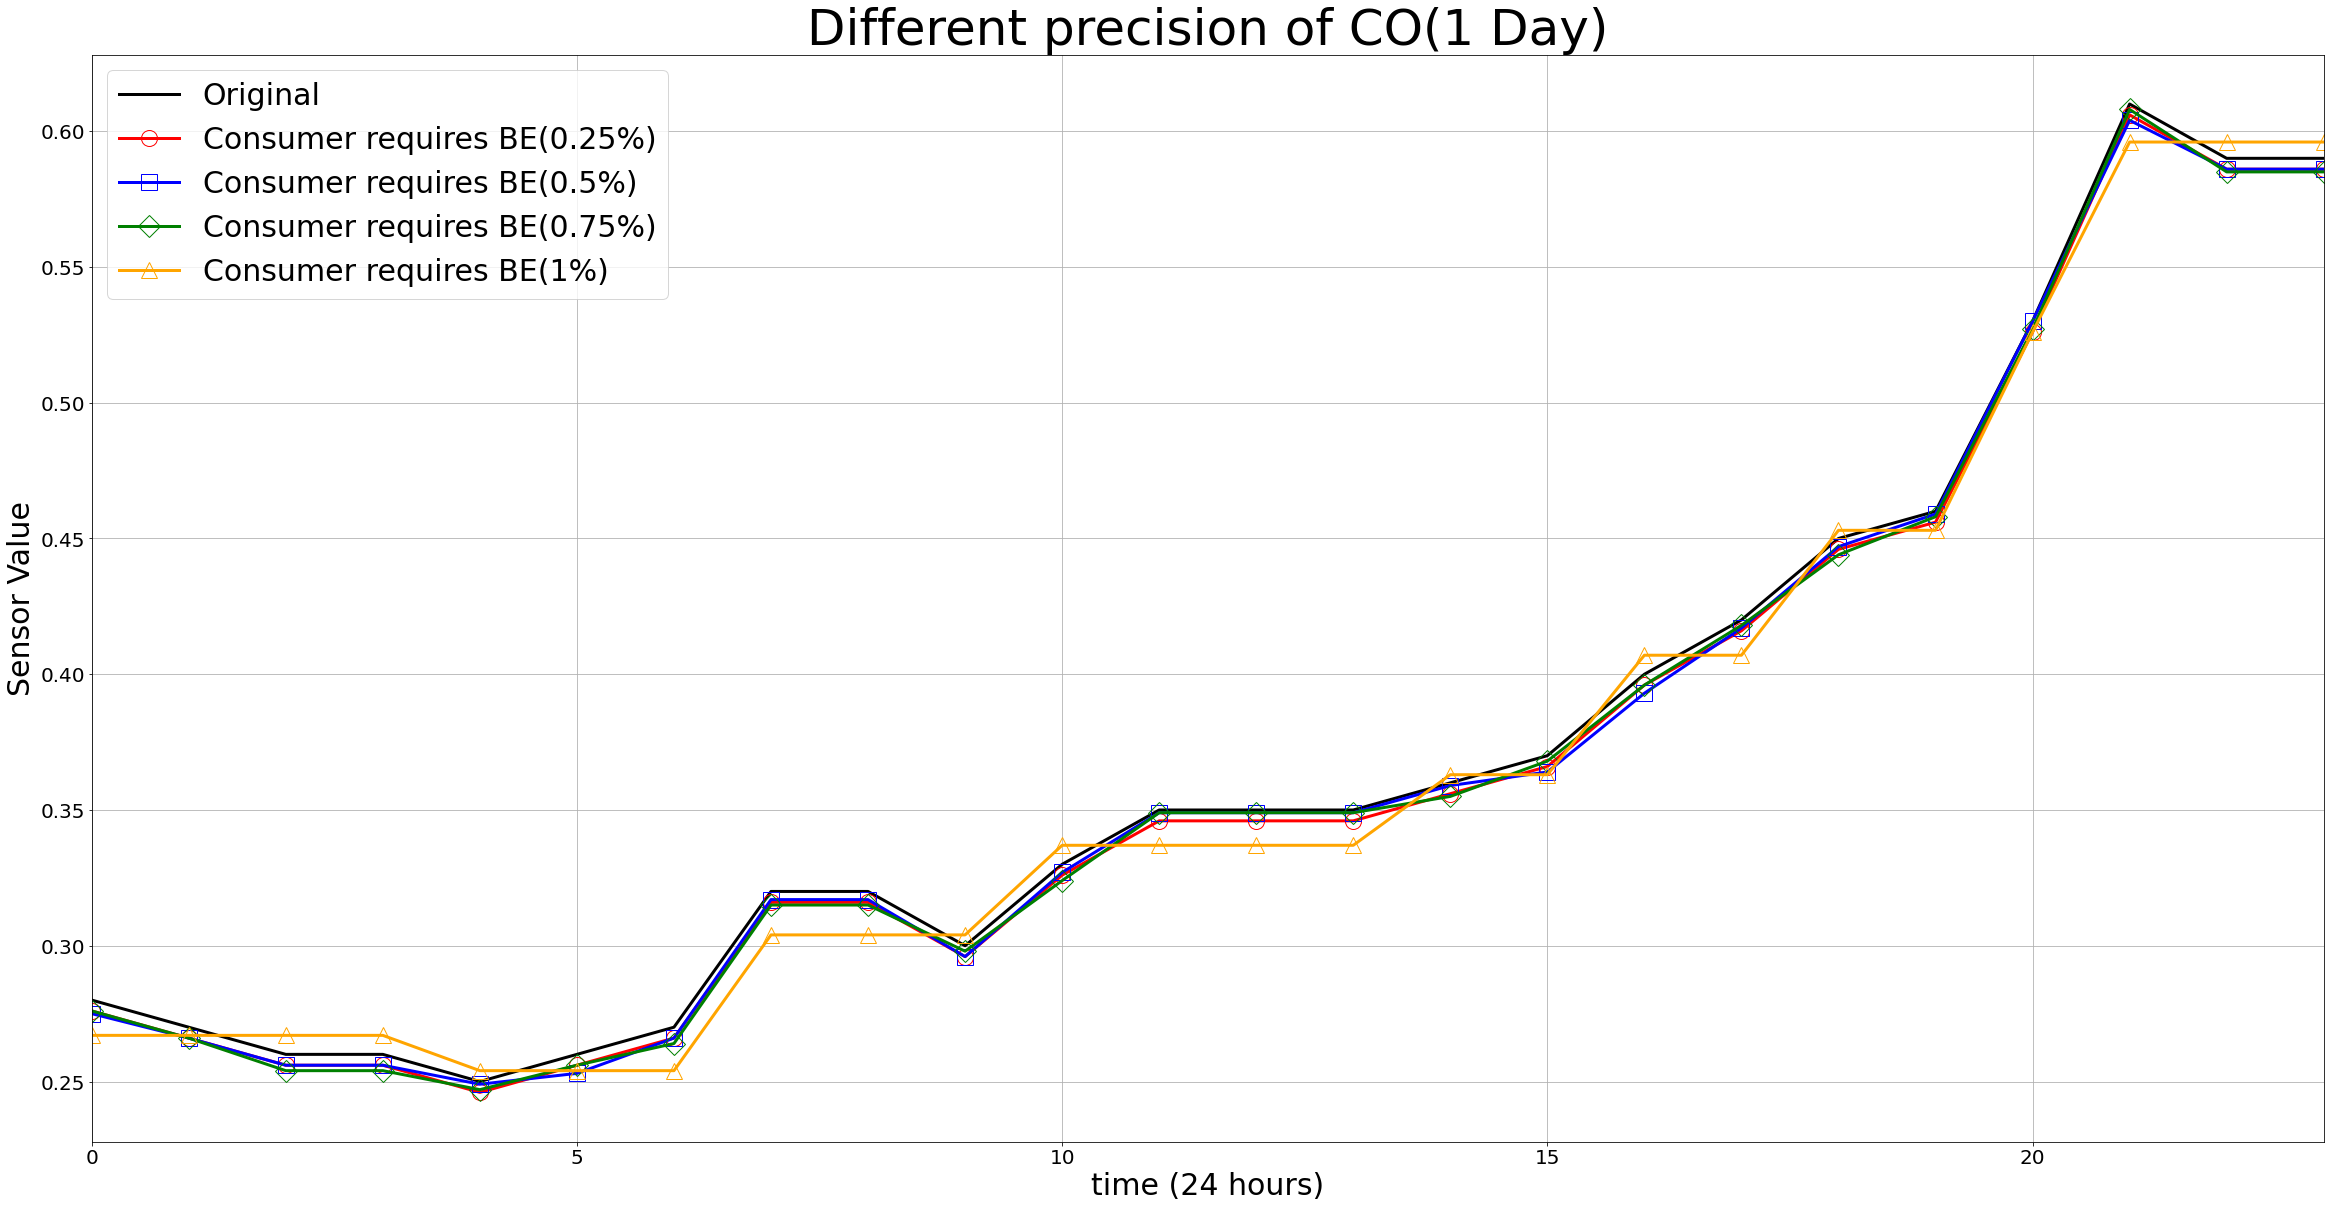

In [112]:
plt.figure(figsize=(40,20))
plt.rc('legend', fontsize='30')

plt.plot(SmartMeter_original,label='Original',color='black',linewidth=3,linestyle='-')
plt.plot(high_precision_result,label='Consumer requires BE(0.25%)',color='red',linewidth=3,linestyle='-',marker='o',markerfacecolor='none',ms=16)
plt.plot(medium_precision_result,label='Consumer requires BE(0.5%)',color='blue',linewidth=3,linestyle='-',marker='s',markerfacecolor='none',ms=16)
plt.plot(low_precision_result,label='Consumer requires BE(0.75%)',color='green',linewidth=3,linestyle='-',marker='D',markerfacecolor='none',ms=16)
plt.plot(low_low_precision_result,label='Consumer requires BE(1%)',color='orange',linewidth=3,linestyle='-',marker='^',markerfacecolor='none',ms=16)


# 限制x軸的顯示範圍
plt.xlim((0,23))
# 限制y軸的顯示範圍
# plt.ylim((10, 25))
plt.title('Different precision of CO(1 Day)',fontsize=50)
plt.xlabel('time (24 hours)',fontsize=30)
plt.ylabel('Sensor Value',fontsize=30)

plt.legend()
plt.grid()
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.show()